<a href="https://colab.research.google.com/github/joelbolt35/Machine_Learning/blob/master/HW_2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

## Import numpy and pyploy & matplot


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Function 1:

f(x,y) = sqrt(x^2 + y^2)


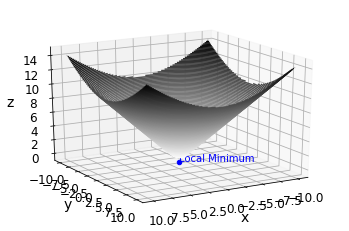

In [303]:
def func1(x, y):
    return np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(x, y)
Z = func1(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.scatter(0, 0, 0, color='blue')
ax.text(0, 0, 0, "Local Minimum", color='blue')
ax.view_init(20, 60)

## Function 2:

f(x,y) = 1 - sqrt(x^2 + y^2)

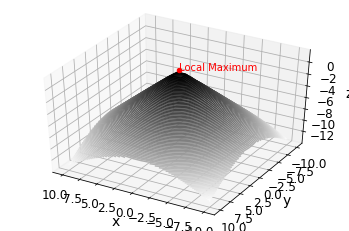

In [297]:
def func2(x, y):
    return 1 - np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(x, y)
Z = func2(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.scatter(0, 0, 1, color='red')
ax.text(0, 0, 1, "Local Maximum", color='red')
ax.view_init(40, 120)

## Function 3:

f(x,y) = x^3 + y^2

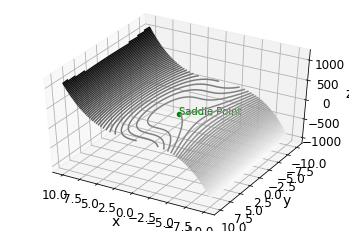

In [294]:
def func3(x, y):
    return (x**3+y**2)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = func3(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(0, 0, 0, color='green')
ax.text(0, 0, 0, "Saddle Point", color='green')
ax.view_init(40, 120)

# Problem 2

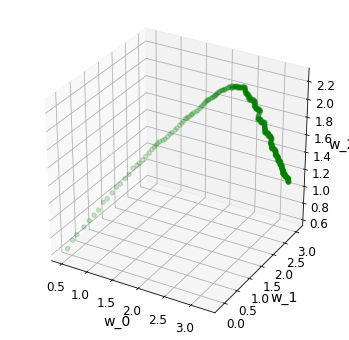

In [296]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Generate Default Values
m = 100
X1 = 2 * np.random.rand(m, 1)
X2 = 2 * np.random.rand(m, 1)
y = 4 + 3 * X1 + np.random.rand(m, 1)

# number of epochs
epochs = 20

# learning rate
lr = 0.01

# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) # 3x1

# add X1 & X2 to the matrix
X_b = np.column_stack([np.ones((m, 1)), X1, X2]) # mx3

weight = initial_weight # 3x1
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices] # mx3
    y_shuffled = y[shuffled_indices] # mx1 random
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        # print(xi)
        yi = y_shuffled[i:i+batch_size]
        # print(yi)
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

weight_path_mgd = np.array(weight_path_mgd)
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('w_2')
ax.scatter(weight_path_mgd[:, 0], weight_path_mgd[:, 1], weight_path_mgd[:, 2], color="green", alpha=0.2)



# Problem 3

## Interpretation 1:
Add up all digits in MNIST and divide by the amount of digits in the dataset

In [252]:
# Import tensorflow
import tensorflow as tf

total = 0
# Grabbed from https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
for i in y_train:
  total += i
total / len(y_train)

4.4539333333333335

## Interpretation 2:
The Average time each individual digit occurs in the dataset

In [280]:
# Import tensorflow
import tensorflow as tf

# Grabbed from https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Initialize an array with 0's
averages = []
for i in range(10):
  averages.append(0)

# Add 1 everytime number is seen
for i in y_train:
  averages[i] += 1

# Divide each number by size of training set to get average appearence
for i in range(10):
  averages[i] /= len(y_train)

# Print averages
for index, avg in enumerate(averages):
  print(str(index) + " appears " + str(round(100*avg,2)) + "%")

# Check to ensure totals add to approx. 100%
total = 0
for i in range(10):
  total += averages[i]
print(round(total,2))

0 appears 9.87%
1 appears 11.24%
2 appears 9.93%
3 appears 10.22%
4 appears 9.74%
5 appears 9.04%
6 appears 9.86%
7 appears 10.44%
8 appears 9.75%
9 appears 9.92%
1.0
